In [1]:
!pip3 install xgboost

### importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### loading the X_train, X_test, Y_train and Y_test 

In [2]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [3]:
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_train: ", y_train.shape)
print("shape of Y_test: ", y_test.shape)

shape of X_train:  (122289, 1044)
shape of X_test:  (60232, 1044)
shape of Y_train:  (122289, 5)
shape of Y_test:  (60232, 5)


### XGBoost Classifier

In [47]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [56]:
X_test, y_test = sm.fit_resample(X_test, y_test)

In [48]:
## XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 100, seed = 123)
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123, ...)

#### accuracy on training dataset

In [49]:
y_pred_train = xgb_clf.predict(X_train)
y_pred_prob_train = xgb_clf.predict_proba(X_train)[:,1]

In [50]:
print("Accuracy: ", accuracy_score(y_train, y_pred_train))

Accuracy:  0.7336355869139818


#### accuracy on testing dataset

In [57]:
y_pred = xgb_clf.predict(X_test)
y_pred_prob = xgb_clf.predict_proba(X_test)[:,1]

In [58]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7093519923565447


In [59]:
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

In [60]:
matrix

array([[24817,  2750,  1849,  2424,  3746],
       [ 2855, 32324,   139,   130,   138],
       [ 1018,   111, 32771,  1569,   117],
       [ 4701,  1178,    97, 27821,  1789],
       [13182,  2494,  1163,  4187, 14560]])

#### plotting the confusion matrix

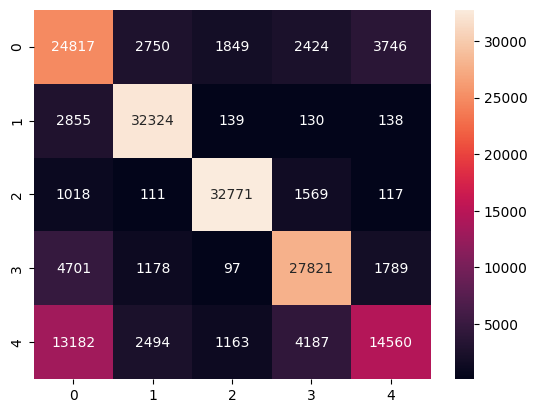

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

#### classification report

In [31]:
print("Classification Report: \n", classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.43      0.48     15346
           1       0.57      0.01      0.01       786
           2       0.67      0.62      0.64      2717
           3       0.74      0.41      0.52      5797
           4       0.71      0.85      0.78     35586

    accuracy                           0.68     60232
   macro avg       0.65      0.46      0.49     60232
weighted avg       0.67      0.68      0.66     60232

